In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
parent_directory = os.path.dirname(os.getcwd())
input_data_path = os.path.join(parent_directory, "data", "skylab_instagram_datathon_dataset.csv")
output_data_path = os.path.join(
        os.getcwd(), "data", "data_cleaned.csv"
    )

In [2]:
df = pd.read_csv("../data/skylab_instagram_datathon_dataset.csv", on_bad_lines='skip', delimiter= ';')

In [3]:
df['period_end_date'] = pd.to_datetime(df['period_end_date'], format='%Y-%m-%d')
df= df.sort_values(by='period_end_date')
df.reset_index(drop=True, inplace=True)
df.head

<bound method NDFrame.head of         period period_end_date                  compset_group  \
0       Weekly      2015-01-03                 Apparel Retail   
1       Weekly      2015-01-03  Luxury & Premium & Mainstream   
2       Weekly      2015-01-03  Luxury & Premium & Mainstream   
3       Weekly      2015-01-03                  Food Products   
4       Weekly      2015-01-03  Luxury & Premium & Mainstream   
...        ...             ...                            ...   
704308  Weekly      2023-09-16                      Beverages   
704309  Weekly      2023-09-16                 Apparel Retail   
704310  Weekly      2023-09-16  Luxury & Premium & Mainstream   
704311  Weekly      2023-09-16  Luxury & Premium & Mainstream   
704312  Weekly      2023-09-16                 Sporting Goods   

                                     compset  \
0                       Latam Apparel Retail   
1       Global Luxury Analysts Interest List   
2         US Softlines Analyst Interest List 

In [4]:
for column in df.select_dtypes(include='object').columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {len(unique_values)}")


Unique values for period: 1
Unique values for compset_group: 20
Unique values for compset: 54
Unique values for business_entity_doing_business_as_name: 706
Unique values for legal_entity_name: 424
Unique values for domicile_country_name: 27
Unique values for ultimate_parent_legal_entity_name: 402
Unique values for primary_exchange_name: 31
Unique values for calculation_type: 1


In [5]:
# Temporal features
df['year'] = df['period_end_date'].dt.year
df['month'] = df['period_end_date'].dt.month

# Calculate growth rates
for metric in ['followers', 'likes', 'comments', 'pictures', 'videos']:
    df[f'{metric}_growth'] = df[metric].pct_change()

# Engagement ratios
df['content'] = df['videos'] + df['pictures']
df['engagement'] = df['likes'] + df['comments']
df['likes_to_followers'] = df['likes'] / df['followers']
df['comments_to_likes'] = df['comments'] / df['likes']
df['content_engagement'] = df['engagement'] / df['content']
df['followers_gained'] = df.groupby(['compset', 'business_entity_doing_business_as_name'])['followers'].diff()
df['followers_gained'].fillna(0, inplace=True)

# Normalize metrics (example using Min-Max scaling)
for metric in ['followers', 'likes', 'comments', 'pictures', 'videos']:
    df[f'{metric}_normalized'] = (df[metric] - df[metric].min()) / (df[metric].max() - df[metric].min())

# Remove any infinities or missing values created by division or pct_change
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df.fillna(method='ffill', inplace=True)  # Forward fill to handle initial NA from pct_change

# Print unique values count for each 'object' type column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {len(unique_values)}")

C:\Users\ronan\AppData\Local\Temp\ipykernel_24508\2790808402.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df[f'{metric}_growth'] = df[metric].pct_change()
C:\Users\ronan\AppData\Local\Temp\ipykernel_24508\2790808402.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df[f'{metric}_growth'] = df[metric].pct_change()
C:\Users\ronan\AppData\Local\Temp\ipykernel_24508\2790808402.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df[f'{metric}_growth'] = df[metric].pct_change()
C:\Users\rona

Unique values for period: 1
Unique values for period_end_date: 455
Unique values for compset_group: 20
Unique values for compset: 54
Unique values for business_entity_doing_business_as_name: 706
Unique values for legal_entity_name: 423
Unique values for domicile_country_name: 26
Unique values for ultimate_parent_legal_entity_name: 401
Unique values for primary_exchange_name: 30
Unique values for calculation_type: 1
Unique values for followers: 243232
Unique values for pictures: 8190
Unique values for videos: 3748
Unique values for comments: 52500
Unique values for likes: 197943
Unique values for year: 9
Unique values for month: 12
Unique values for followers_growth: 572673
Unique values for likes_growth: 668719
Unique values for comments_growth: 595575
Unique values for pictures_growth: 122739
Unique values for videos_growth: 33742
Unique values for content: 8802
Unique values for engagement: 199671
Unique values for likes_to_followers: 251602
Unique values for comments_to_likes: 29560

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704313 entries, 0 to 704312
Data columns (total 33 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   period                                  704313 non-null  object        
 1   period_end_date                         704313 non-null  datetime64[ns]
 2   compset_group                           704313 non-null  object        
 3   compset                                 704313 non-null  object        
 4   business_entity_doing_business_as_name  704313 non-null  object        
 5   legal_entity_name                       704313 non-null  object        
 6   domicile_country_name                   704313 non-null  object        
 7   ultimate_parent_legal_entity_name       704313 non-null  object        
 8   primary_exchange_name                   704313 non-null  object        
 9   calculation_type                     

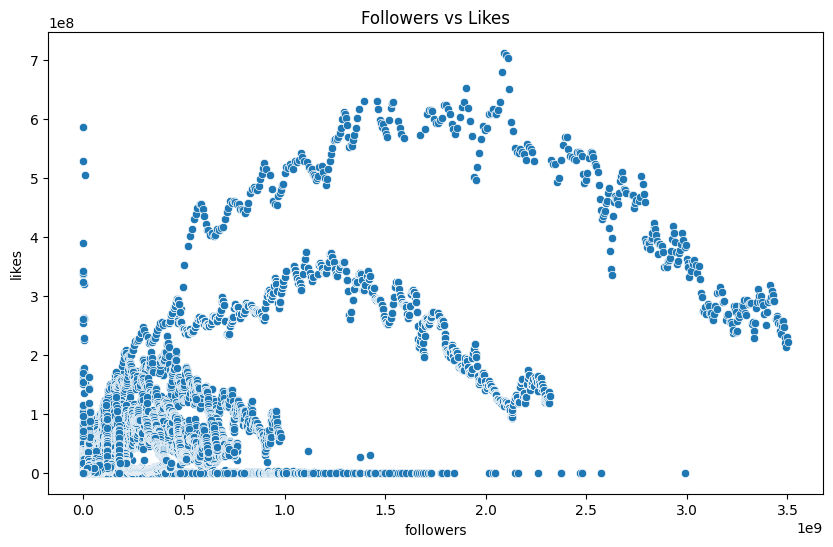

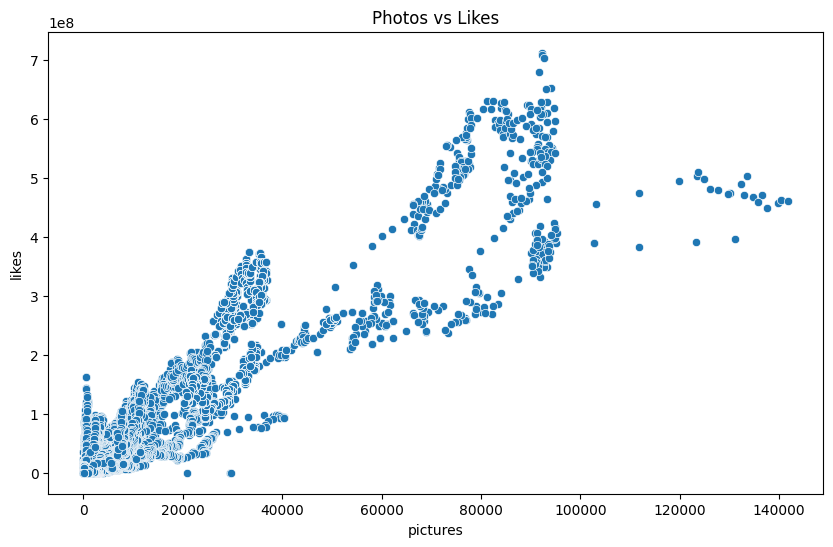

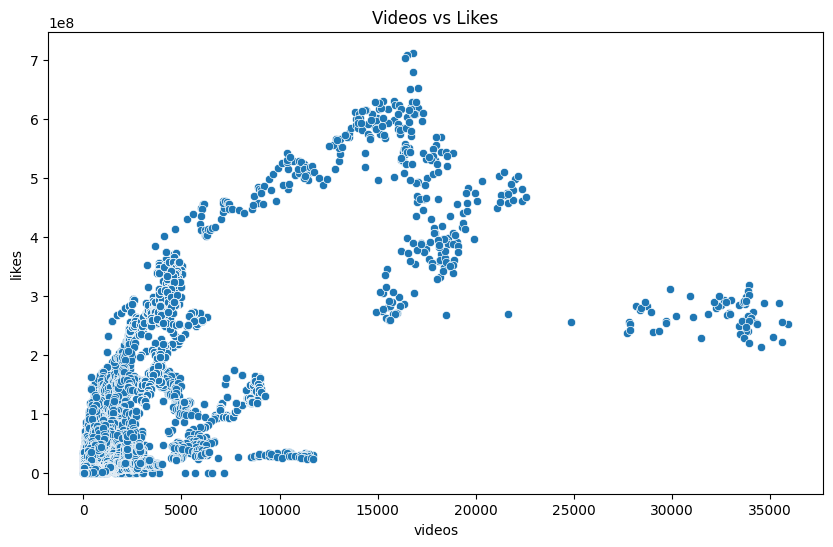

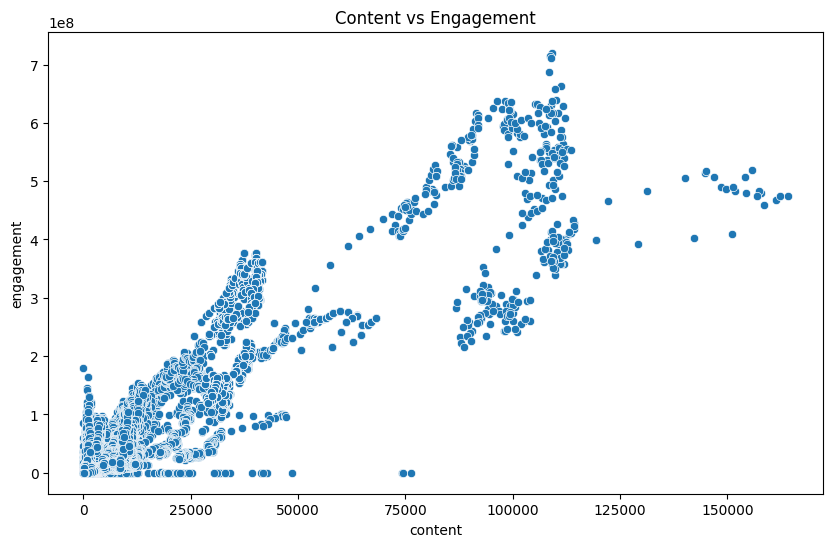

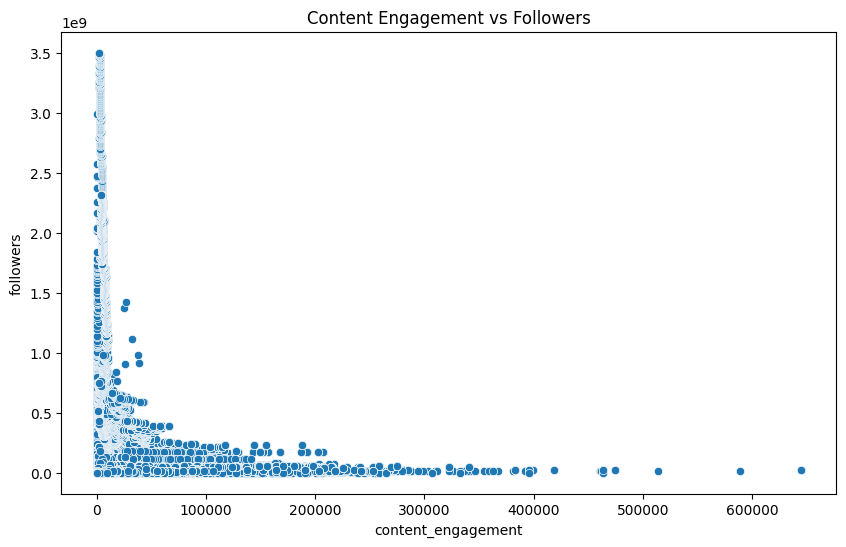

In [6]:
# Display basic information and summary statistics
print(df.info())
print(df.describe())

# # Histograms to view distributions of numeric features
# numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
# df[numeric_columns].hist(bins=15, figsize=(15, 6), layout=(2, 4))
# plt.tight_layout()
# plt.show()

# # Box plots to identify outliers in numeric features
# fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(15, 5))
# for ax, col in zip(axes, numeric_columns):
#     df.boxplot(column=col, ax=ax, vert=False)
#     ax.set_title(col)
# plt.tight_layout()
# plt.show()

# # Pairplot to visualize relationships and distributions together
# # Select a subset if too many numeric columns
# sns.pairplot(df[numeric_columns[:4]])
# plt.show()

# # Correlation matrix heatmap
# correlation_matrix = df[numeric_columns].corr()
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

# Scatter plots for specific variables to investigate potential relationships
# Example: followers vs likes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='followers', y='likes')
plt.title('Followers vs Likes')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pictures', y='likes')
plt.title('Photos vs Likes')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='videos', y='likes')
plt.title('Videos vs Likes')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='content', y='engagement')
plt.title('Content vs Engagement')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='content_engagement', y='followers')
plt.title('Content Engagement vs Followers')
plt.show()



# Further investigate any specific relationships or anomalies
# Example: time series trend of followers
# plt.figure(figsize=(10, 6))
# df.plot(x='period_end_date', y='followers')
# plt.title('Trend of Followers Over Time')
# plt.xlabel('Date')
# plt.ylabel('Number of Followers')
# plt.show()

In [ ]:
# Save the cleaned and enriched dataset
df.to_csv(output_data_path, index=False)